In [2]:
#8.01 简介

'''
属性 attributes
属性是与对象绑定的一组数据，可以只读，只写，或者读写，使用时不加括号，例如：
'''
f=open("new_file",'w')

In [4]:
f.mode

'w'

In [5]:
f.closed

False

In [6]:
f.mode = 'r'

In [7]:
#获取属性不需要加括号：
f.mode()

TypeError: 'str' object is not callable

In [8]:
'''
方法 method
方法是与属性绑定的一组函数，需要使用括号，作用于对象本身：
'''
f.write('Hi.\n')
f.seek(0)
f.write('Hola!\n')
f.close()

In [9]:
!rm new_file

'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [12]:
import os
os.remove("new_file")

In [1]:
#8.02 使用OOP对森林火灾建模

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#对森林建模

class Forest(object):
    def __init__(self, size=(150, 150), p_sapling=0.0025, p_lightning=5.e-6, name=None):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.forest_fires = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        if name is not None:
            self.name = name
        else:
            self.name = self.__class__.__name__

    @property
    def num_cells(self):
        return self.size[0] * self.size[1]

    @property
    def tree_fraction(self):
        return self.trees.sum() / float(self.num_cells)

    @property
    def fire_fraction(self):
        return self.forest_fires.sum() / float(self.num_cells)

    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

    def grow_trees(self):
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

    def start_fires(self):
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.forest_fires[lightning_strikes] = True
        
    def burn_trees(self):
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.forest_fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.forest_fires] = False
        self.forest_fires = new_fires

    def _rand_bool(self, p):
        return np.random.uniform(size=self.trees.shape) < p

In [3]:
#定义一个森林类之后，我们创建一个新的森林类对象：
forest = Forest()

In [5]:
#显示当前的状态：

print(forest.trees)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


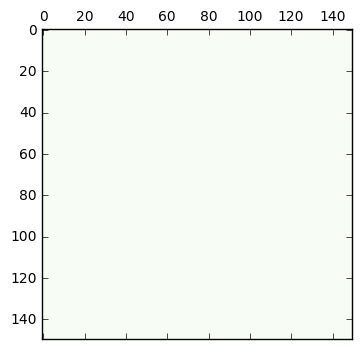

In [6]:
#使用 matshow 进行可视化：

plt.matshow(forest.trees, cmap=plt.cm.Greens)

plt.show()

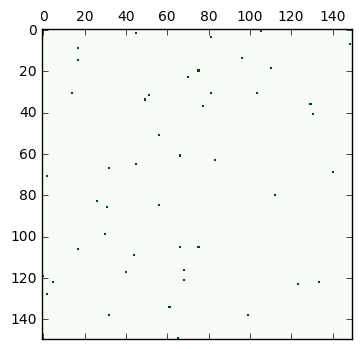

In [7]:
#模拟森林生长和火灾的过程


#经过一段时间：

forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
plt.show()

0.5115555555555555


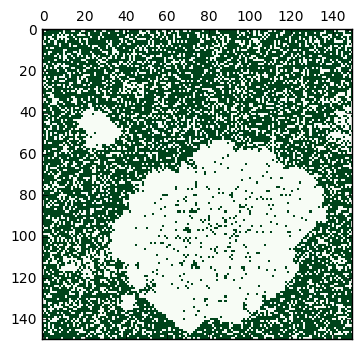

In [9]:
#循环很长时间：

for i in range(500):
    forest.advance_one_step()
plt.matshow(forest.trees, cmap=plt.cm.Greens)
print(forest.tree_fraction)

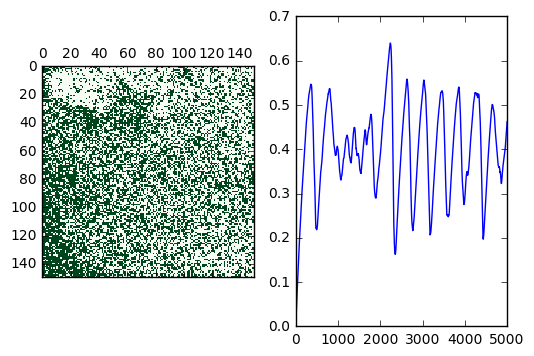

In [10]:
#迭代更长时间：

forest = Forest()
tree_fractions = []
for i in range(5000):
    forest.advance_one_step()
    tree_fractions.append(forest.tree_fraction)
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax0.matshow(forest.trees, cmap=plt.cm.Greens)
ax1 = fig.add_subplot(1,2,2)
ax1.plot(tree_fractions)

plt.show()

In [11]:
#8.03 什么是对象？

'''
在 Python 中，几乎所有的东西都是对象。

整数是对象：
'''

a=257

In [12]:
type(a)

int

In [13]:
id(a)

1833359467280

In [14]:
#b 和 a 是同一个对象：
b=a

In [15]:
id(b)

1833359467280

In [16]:
c=258
id(c)

1833359468624

In [17]:
#函数：

def foo():
    print("hi")

In [18]:
type(foo)

function

In [19]:
id(foo)

1833376234080

In [20]:
#type 函数本身也是对象：

type(type)

type

In [21]:
id(type)

1953226304

In [22]:
#只有一些保留的关键词不是对象：

id(if)

SyntaxError: invalid syntax (<ipython-input-22-5e89654ebd4d>, line 3)

In [23]:
id(+)

SyntaxError: invalid syntax (<ipython-input-23-86853fe3c6fd>, line 1)

In [25]:
#8.04 定义class


#class 定义如下：
'''
class ClassName(ParentClass):
    """class docstring"""
    def method(self):
        return

class 关键词在最前面
ClassName 通常采用 CamelCase 记法
括号中的 ParentClass 用来表示继承关系
冒号不能缺少
"""""" 中的内容表示 docstring，可以省略
方法定义与函数定义十分类似，不过多了一个 self 参数表示这个对象本身
class 中的方法要进行缩进
'''

'\nclass ClassName(ParentClass):\n    """class docstring"""\n    def method(self):\n        return\n\nclass 关键词在最前面\nClassName 通常采用 CamelCase 记法\n括号中的 ParentClass 用来表示继承关系\n冒号不能缺少\n"""""" 中的内容表示 docstring，可以省略\n方法定义与函数定义十分类似，不过多了一个 self 参数表示这个对象本身\nclass 中的方法要进行缩进\n'

In [28]:
class Forest(object):
    """ Forest can grow trees which eventually die."""
    pass

In [27]:
#其中 object 是最基本的类型。

#查看帮助：

In [29]:
import numpy as np
np.info(Forest)

 Forest()

Forest can grow trees which eventually die.


Methods:



In [30]:
forest = Forest()

In [31]:
forest

In [32]:
#添加方法和属性

#可以直接添加属性（有更好的替代方式）：
forest.trees = np.zeros((150,150),dtype=bool)
forest.trees

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
forest2 = Forest()

In [34]:
#forest2 没有这个属性：
forest2.tree()

AttributeError: 'Forest' object has no attribute 'tree'

In [35]:
'''
添加方法时，
默认第一个参数是对象本身，一般为 self，可能用到也可能用不到，然后才是其他的参数：
'''
class Forest(object):
    """ Forest can grow trees which eventually die."""
    def grow(self):
        print("the tree is growing!")
    
    def number(self, num=1):
        if num==1:
            print("there is 1 tree.")
        else:
            print("there are =",num,"trees.")

In [36]:
forest = Forest()

forest.grow()
forest.number(12)

the tree is growing!
there are = 12 trees.


In [37]:
#8.05 特殊方法

'''
特殊方法
Python 使用 __ 开头的名字来定义特殊的方法和属性，它们有：

__init__()
__repr__()
__str__()
__call__()
__iter__()
__add__()
__sub__()
__mul__()
__rmul__()
__class__
__name__
'''

'\n特殊方法\nPython 使用 __ 开头的名字来定义特殊的方法和属性，它们有：\n\n__init__()\n__repr__()\n__str__()\n__call__()\n__iter__()\n__add__()\n__sub__()\n__mul__()\n__rmul__()\n__class__\n__name__\n'

In [38]:
'''
构造方法 __init__()
之前说到，在产生对象之后，我们可以向对象中添加属性。
事实上，还可以通过构造方法，在构造对象的时候直接添加属性：
'''
class Leaf(object):
    """
    A leaf falling in the woods.
    """
    def __init__(self, color="green"):
        self.color = color

In [39]:
#默认属性值：
leaf1 = Leaf()
print(leaf1.color)

green


In [40]:
#传入有参数的值：
leaf2 = Leaf("orange")
print(leaf2.color)

orange


In [41]:
#回到森林的例子：

import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self):
        self.trees = np.zeros((150,150),dtype=bool)
        self.fires = np.zeros((150,150),dtype=bool)

In [42]:
#我们在构造方法中定义了两个属性 trees 和 fires：
forest = Forest()
forest.trees

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [43]:
forest.fires

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
#修改属性的值：

forest.trees[0,0]=True
forest.trees

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [45]:
#改变它的属性值不会影响其他对象的属性值：

forest2 = Forest()
forest2.trees

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [46]:
'''
事实上，__new__() 才是真正产生新对象的方法，__init__() 只是对对象进行了初始化，所以：

leaf = Leaf()
相当于

my_new_leaf = Leaf.__new__(Leaf)
Leaf.__init__(my_new_leaf)
leaf = my_new_leaf
'''

'\n事实上，__new__() 才是真正产生新对象的方法，__init__() 只是对对象进行了初始化，所以：\n\nleaf = Leaf()\n相当于\n\nmy_new_leaf = Leaf.__new__(Leaf)\nLeaf.__init__(my_new_leaf)\nleaf = my_new_leaf\n'

In [47]:
#表示方法 __repr__() 和 __str__()

class Leaf(object):
    """
    A leaf falling in the woods.
    """
    def __init__(self,color="green"):
        self.color=color
    def __str__(self):
        "This is the string that is printed."
        return "A {} leaf".format(self.color)
    def __repr__(self):
        "This string recreates the object."
        return "{}(color='{}')".format(self.__class__.__name__, self.color)

In [48]:
#__str__() 是使用 print 函数显示的结果：

leaf = Leaf()
print(leaf)

A green leaf


In [49]:
#__repr__() 返回的是不使用 print 方法的结果：

leaf

Leaf(color='green')

In [50]:
#回到森林的例子：

import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self,size=(150,150)):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
    
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__

In [51]:
forest = Forest()

In [52]:
#__str__() 方法：

print(forest)

Forest


In [53]:
#__repr__() 方法：

forest

Forest(size=(150, 150))

In [54]:
#__name__ 和 __class__ 为特殊的属性：

forest.__class__

__main__.Forest

In [55]:
forest.__class__.__name__

'Forest'

In [57]:
#8.06 属性

'''
只读属性
只读属性，顾名思义，指的是只可读不可写的属性，之前我们定义的属性都是可读可写的，
对于只读属性，我们需要使用 @property 修饰符来得到：
'''

class Leaf(object):
    def __init__(self, mass_mg):
        self.mass_mg = mass_mg

    # 这样 mass_oz 就变成属性了
    @property
    def mass_oz(self):
        return self.mass_mg * 3.53e-5

In [58]:
#这里 mass_oz 就是一个只读不写的属性（注意是属性不是方法）
#而 mass_mg 是可读写的属性：

leaf = Leaf(200)
print(leaf.mass_oz)

0.0070599999999999994


In [59]:
#可以修改 mass_mg 属性来改变 mass_oz：

leaf.mass_mg = 150
print(leaf.mass_oz)

0.005294999999999999


In [60]:
#是属性不是方法：

leaf.mass_oz()

TypeError: 'float' object is not callable

In [61]:
#而且是只读属性，不可写：

leaf.mass_oz = 0.001

AttributeError: can't set attribute

In [62]:
#回到 forest 的例子，我们希望加入几个只读属性：

import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self,size=(150,150)):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum();
        return float(num_trees) / self.num_cells
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells

In [63]:
#查看属性：
forest = Forest()

forest.num_cells

22500

In [65]:
#生成一个较小的森林：

small_forest = Forest((10, 10))
small_forest.num_cells

100

In [66]:
#初始状态下，树和火灾的比例都是 0：
small_forest.tree_fraction

0.0

In [67]:
small_forest.fire_fraction

0.0

In [113]:
#可读写的属性
#对于 @property 生成的只读属性，
#我们可以使用相应的 @attr.setter 修饰符来使得这个属性变成可写的：

class Leaf(object):
    def __init__(self,mass_mg):
        self.mass_mg = mass_mg
        
    # 这样 mass_oz 就变成属性了
    @property
    def mass_oz(self):
        return self.mass_mg * 3.53e-5
    
    # 使用 mass_oz.setter 修饰符
    @mass_oz.setter
    def mass_oz(self,m_oz):
        self.mass_mg = m_oz / 3.53e-5
    #将mass_oz赋值为m_oz，并用来更改mass_mg属性的值

In [114]:
#测试：

leaf = Leaf(200)
print(leaf.mass_oz)

leaf.mass_mg = 150
print(leaf.mass_oz)

0.0070599999999999994
0.005294999999999999


In [116]:
#修改 mass_oz 属性：
leaf.mass_oz =0.01
print(leaf.mass_mg)
print(leaf.mass_oz)

283.28611898017
0.01


In [ ]:
'''
一个等价的替代如下：

class Leaf(object):
    def __init__(self, mass_mg):
        self.mass_mg = mass_mg

    def get_mass_oz(self):
        return self.mass_mg * 3.53e-5

    def set_mass_oz(self, m_oz):
        self.mass_mg = m_oz / 3.53e-5

    mass_oz = property(get_mass_oz, set_mass_oz)
'''

In [117]:
#8.07 森林火灾模拟

'''
森林火灾模拟
之前我们已经构建好了一些基础，但是还没有开始对火灾进行模拟。

随机生长
在原来的基础上,我们要先让树生长，即定义 grow_trees() 方法
定义方法之前，我们要先指定两个属性：
每个位置随机生长出树木的概率
每个位置随机被闪电击中的概率
为了方便，我们定义一个辅助函数来生成随机 bool 矩阵，大小与森林大小一致
按照给定的生长概率生成生长的位置，将 trees 中相应位置设为 True
'''

import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025, p_lightning=5.0e-6):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def _rand_bool(self,p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

In [118]:
#测试：

forest = Forest()
print(forest.tree_fraction)

forest.grow_trees()
print(forest.tree_fraction)

0.0
0.002


In [121]:
'''
火灾模拟
定义 start_fires()：
    按照给定的概率生成被闪电击中的位置
    如果闪电击中的位置有树，那么将其设为着火点
定义 burn_trees()：
    如果一棵树的上下左右有火，那么这棵树也会着火
定义 advance_one_step()：
    进行一次生长，起火，燃烧
'''

import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025, p_lightning=5.0e-6):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True
        
    def start_fires(self):
        """
        Start of fire.
        """
        lightning_strikes = (self._rand_bool(self.p_lightning) & self.trees)
        self.fires[lightning_strikes] = True
    
    def burn_trees(self):
        """
        Burn trees.
        """
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.fires] = False
        self.fires = new_fires
    
    def advance_one_step(self):
        """
        Advance one step
        """
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

In [122]:
forest= Forest()

for i in range(100):
    forest.advance_one_step()

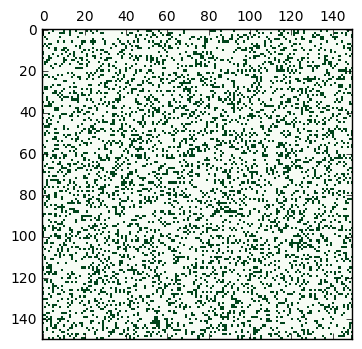

In [123]:
#使用 matshow() 显示树木图像：

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

plt.matshow(forest.trees, cmap=cm.Greens)

plt.show()

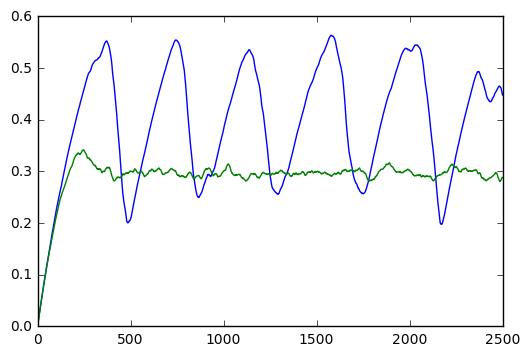

In [129]:
#查看不同着火概率下的森林覆盖率趋势变化：

forest = Forest()
forest2 = Forest(p_lightning=5e-4)

tree_fractions = []

for i in range(2500):
    forest.advance_one_step()
    forest2.advance_one_step()
    #tree_fractions.append(forest.tree_fraction)
    tree_fractions.append((forest.tree_fraction, forest2.tree_fraction))
    
plt.plot(tree_fractions)

plt.show()

In [130]:
#8.08 继承

'''
继承
一个类定义的基本形式如下：

class ClassName(ParentClass):
    """class docstring"""
    def method(self):
        return
class 关键词在最前面
ClassName 通常采用 CamelCase 记法
括号中的 ParentClass 用来表示继承关系
冒号不能缺少
"""""" 中的内容表示 docstring，可以省略
方法定义与函数定义十分类似，不过多了一个 self 参数表示这个对象本身
class 中的方法要进行缩进
在里面有一个 ParentClass 项，用来进行继承，被继承的类是父类，定义的这个类是子类。 
对于子类来说，继承意味着它可以使用所有父类的方法和属性，
同时还可以定义自己特殊的方法和属性。
'''

#假设我们有这样一个父类：

class Leaf(object):
    def __init__(self, color='green'):
        self.color=color
    def fall(self):
        print("Splat!")

In [131]:
#测试：
leaf = Leaf()
print(leaf.color)

green


In [132]:
leaf.fall()

Splat!


In [133]:
#现在定义一个子类，继承自 Leaf：

class MapleLeaf(Leaf):
    def change_color(self):
        if self.color == "green":
            self.color="red"

In [134]:
#继承父类的所有方法：

mleaf = MapleLeaf()

print(mleaf.color)

green


In [135]:
mleaf.fall()

Splat!


In [136]:
#但是有自己独有的方法，父类中没有：

mleaf.change_color()

print(mleaf.color)

red


In [138]:
#如果想对父类的方法进行修改，只需要在子类中重定义这个类即可：

class MapleLeaf(Leaf):
    def change_color(self):
        if self.color == "green":
            self.color = "red"
    def fall(self):
        self.change_color()
        print("Plunk!")

In [139]:
mleaf = MapleLeaf()

print(mleaf.color)
mleaf.fall()
print(mleaf.color)

green
Plunk!
red


In [141]:
#8.09 super函数

'''
super() 函数
super(CurrentClassName, instance)

返回该类实例对应的父类对象。
'''

class Leaf(object):
    def __init__(self, color="green"):
        self.color = color
    def fall(self):
        print("Splat!")

class MapleLeaf(Leaf):
    def change_color(self):
        if self.color == "green":
            self.color = "red"
    def fall(self):
        self.change_color()
        super(MapleLeaf, self).fall()
        
#这里，我们先改变树叶的颜色，然后再找到这个实例对应的父类，并调用父类的 fall() 方法：

In [142]:
mleaf = MapleLeaf()

print(mleaf.color)
mleaf.fall()
print(mleaf.color)

green
Splat!
red


In [143]:
#回到我们的森林例子，这里我们将森林 Forest 作为父类，并定义一个子类 BurnableForest：

import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True    
        
    def advance_one_step(self):
        """
        Advance one step
        """
        self.grow_trees()

In [144]:
'''
1.将与燃烧相关的属性都被转移到了子类中去。
2.修改两类的构造方法，将闪电概率放到子类的构造方法上，
同时在子类的构造方法中，用 super 调用父类的构造方法。
3.修改 advance_one_step()，父类中只进行生长，
在子类中用 super 调用父类的 advance_one_step() 方法，并添加燃烧的部分。
'''

class BurnableForest(Forest):
    """
    Burnable forest support fires
    """    
    def __init__(self, p_lightning=5.0e-6, **kwargs):
        super(BurnableForest, self).__init__(**kwargs)
        self.p_lightning = p_lightning        
        self.fires = np.zeros((self.size), dtype=bool)
    
    def advance_one_step(self):
        """
        Advance one step
        """
        super(BurnableForest, self).advance_one_step() #调用父类的方法
        self.start_fires()
        self.burn_trees()
        
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def start_fires(self):
        """
        Start of fire.
        """
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.fires[lightning_strikes] = True
        
    def burn_trees(self):
        """
        Burn trees.
        """
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.fires] = False
        self.fires = new_fires

In [145]:
#测试父类：
forest = Forest()

forest.grow_trees()

print(forest.tree_fraction)

0.003022222222222222


In [146]:
#测试子类：

burnable_forest = BurnableForest()


#调用自己和父类的方法：

burnable_forest.grow_trees()
burnable_forest.start_fires()
burnable_forest.burn_trees()
print(burnable_forest.tree_fraction)

0.0027555555555555554


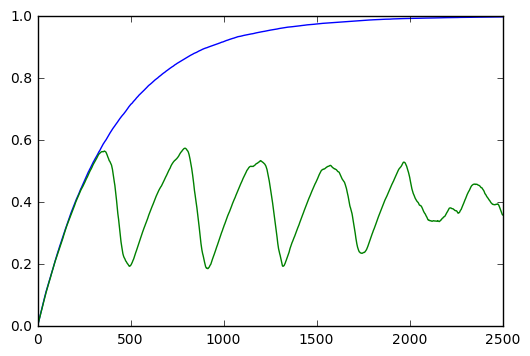

In [147]:
#查看变化：

import matplotlib.pyplot as plt

%matplotlib inline

forest = Forest()
forest2 = BurnableForest()

tree_fractions = []

for i in range(2500):
    forest.advance_one_step()
    forest2.advance_one_step()
    tree_fractions.append((forest.tree_fraction, forest2.tree_fraction))

plt.plot(tree_fractions)

plt.show()

In [148]:
#__str__ 和 __repr__ 中 self.__class__ 会根据类型不同而不同：

forest

Forest(size=(150, 150))

In [149]:
forest2

BurnableForest(size=(150, 150))

In [150]:
print(forest)

Forest


In [151]:
print(forest2)

BurnableForest


In [154]:
#8.10 重定义森林火灾模拟

'''
在前面的例子中，我们定义了一个 BurnableForest，实现了一个循序渐进的生长和燃烧过程。

假设我们现在想要定义一个立即燃烧的过程（每次着火之后燃烧到不能燃烧为止，之后再生长，而不是每次只燃烧周围的一圈树木），由于燃烧过程不同，我们需要从 BurnableForest 中派生出两个新的子类 SlowBurnForest（原来的燃烧过程） 和 InsantBurnForest，为此

将 BurnableForest 中的 burn_trees() 方法改写，不做任何操作，直接 pass（因为在 advance_one_step() 中调用了它，所以不能直接去掉）
在两个子类中定义新的 burn_trees() 方法。
'''

import numpy as np
from scipy.ndimage.measurements import label

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True    
        
    def advance_one_step(self):
        """
        Advance one step
        """
        self.grow_trees()

class BurnableForest(Forest):
    """
    Burnable forest support fires
    """    
    def __init__(self, p_lightning=5.0e-6, **kwargs):
        super(BurnableForest, self).__init__(**kwargs)
        self.p_lightning = p_lightning        
        self.fires = np.zeros((self.size), dtype=bool)
    
    def advance_one_step(self):
        """
        Advance one step
        """
        super(BurnableForest, self).advance_one_step()
        self.start_fires()
        self.burn_trees()
        
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def start_fires(self):
        """
        Start of fire.
        """
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.fires[lightning_strikes] = True
    
    def burn_trees(self):    
        pass

#新的子类
class SlowBurnForest(BurnableForest):
    def burn_trees(self):
        """
        Burn trees.
        """
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.fires] = False
        self.fires = new_fires

class InstantBurnForest(BurnableForest):
    def burn_trees(self):
        # 起火点
        strikes = self.fires
        # 找到连通区域
        groves, num_groves = label(self.trees)
        fires = set(groves[strikes])
        self.fires.fill(False)
        # 将与着火点相连的区域都烧掉
        for fire in fires:
            self.fires[groves == fire] = True
        self.trees[self.fires] = False
        self.fires.fill(False)

In [156]:
#测试：

forest = Forest()
sb_forest = SlowBurnForest()
ib_forest = InstantBurnForest()

forests = [forest, sb_forest, ib_forest]

tree_history = []

for i in range(1500):
    for fst in forests:
        fst.advance_one_step()
    tree_history.append(tuple(fst.tree_fraction for fst in forests))

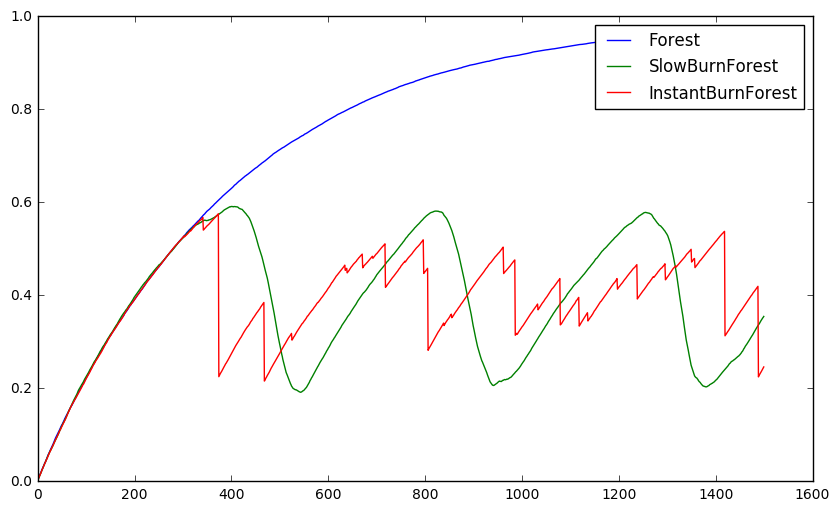

In [157]:
#显示结果：

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

plt.plot(tree_history)
plt.legend([f.__str__() for f in forests])

plt.show()

In [159]:
#8.11 接口

'''
接口
在 Python 中，鸭子类型（duck typing）是一种动态类型的风格。
所谓鸭子类型，来自于 James Whitcomb Riley 的“鸭子测试”：

当看到一只鸟走起来像鸭子、游泳起来像鸭子、叫起来也像鸭子，那么这只鸟就可以被称为鸭子。

假设我们需要定义一个函数，这个函数使用一个类型为鸭子的参数，并调用它的走和叫方法。

在鸭子类型的语言中，这样的函数可以接受任何类型的对象，
只要这个对象实现了走和叫的方法，否则就引发一个运行时错误。
换句话说，任何拥有走和叫方法的参数都是合法的。

'''

#先看一个例子，父类：

class Leaf(object):
    def __init__(self, color="green"):
        self.color = color
    def fall(self):
        print ("Splat!")
        
#子类：

class MapleLeaf(Leaf):
    def fall(self):
        self.color = 'brown'
        super(MapleLeaf, self).fall()
        
#新的类：

class Acorn(object):
    def fall(self):
        print ("Plunk!")

In [160]:
#这三个类都实现了 fall() 方法，因此可以这样使用：

objects = [Leaf(), MapleLeaf(), Acorn()]

for obj in objects:
    obj.fall()

Splat!
Splat!
Plunk!


In [161]:
#这里 fall() 方法就一种鸭子类型的体现。


#不仅方法可以用鸭子类型，属性也可以：

import numpy as np
from scipy.ndimage.measurements import label

class Forest(object):
    """ Forest can grow trees which eventually die."""
    def __init__(self, size=(150,150), p_sapling=0.0025):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.p_sapling = p_sapling
        
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        return np.prod(self.size)
    
    #鸭子属性
    @property
    def losses(self):
        return np.zeros(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True    
        
    def advance_one_step(self):
        """
        Advance one step
        """
        self.grow_trees()

class BurnableForest(Forest):
    """
    Burnable forest support fires
    """    
    def __init__(self, p_lightning=5.0e-6, **kwargs):
        super(BurnableForest, self).__init__(**kwargs)
        self.p_lightning = p_lightning        
        self.fires = np.zeros((self.size), dtype=bool)
    
    def advance_one_step(self):
        """
        Advance one step
        """
        super(BurnableForest, self).advance_one_step()
        self.start_fires()
        self.burn_trees()
    
    #重新定义鸭子属性
    @property
    def losses(self):
        return self.fires
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    def start_fires(self):
        """
        Start of fire.
        """
        lightning_strikes = (self._rand_bool(self.p_lightning) & 
            self.trees)
        self.fires[lightning_strikes] = True
    
    def burn_trees(self):    
        pass
    
class SlowBurnForest(BurnableForest):
    def burn_trees(self):
        """
        Burn trees.
        """
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.fires] = False
        self.fires = new_fires

class InstantBurnForest(BurnableForest):
    def burn_trees(self):
        # 起火点
        strikes = self.fires
        # 找到连通区域
        groves, num_groves = label(self.trees)
        fires = set(groves[strikes])
        self.fires.fill(False)
        # 将与着火点相连的区域都烧掉
        for fire in fires:
            self.fires[groves == fire] = True
        self.trees[self.fires] = False
        self.fires.fill(False)

In [163]:
#测试：

forest = Forest()
b_forest = BurnableForest()
sb_forest = SlowBurnForest()
ib_forest = InstantBurnForest()

forests = [forest, b_forest, sb_forest, ib_forest]

losses_history = []

for i in range(1500):
    for fst in forests:
        fst.advance_one_step()
    losses_history.append(tuple(fst.losses.sum() for fst in forests))

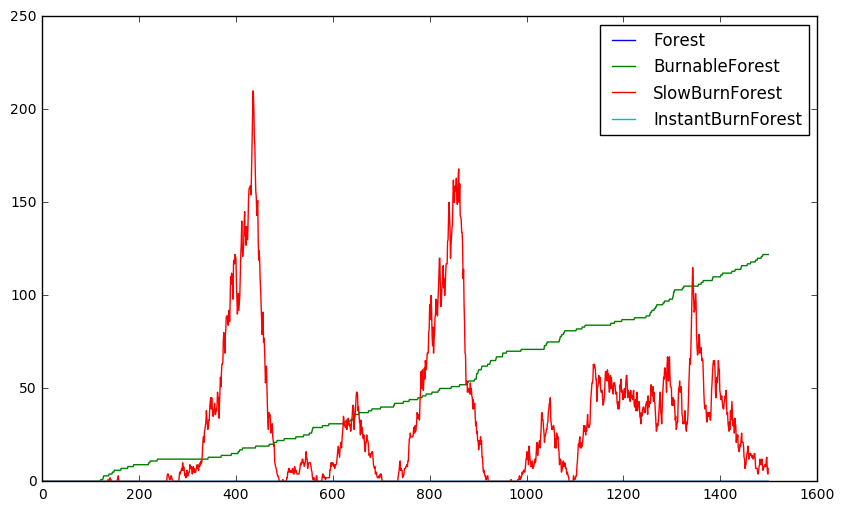

In [164]:
#显示结果：

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

plt.plot(losses_history)
plt.legend([f.__str__() for f in forests])

plt.show()

In [168]:
#8.12 共有，私有和特殊方法和属性

'''
1.我们之前已经见过 special 方法和属性，即以 __ 开头和结尾的方法和属性
2.私有方法和属性，以 _ 开头，不过不是真正私有，而是可以调用的，
但是不会被代码自动完成所记录（即 Tab 键之后不会显示）
3.其他都是共有的方法和属性
4.以 __ 开头不以 __ 结尾的属性是更加特殊的方法，调用方式也不同：

'''

class MyClass(object):
    #特殊
    def __init__(self):
        print("I'm special!") 
    #私有
    def _private(self):
        print( "I'm private!")
    #其他-》公有
    def public(self):
        print("I'm public!") 
    #更加特殊
    def __really_special(self):
        print("I'm really special!") 

In [169]:
m = MyClass()

I'm special!


In [170]:
m.public()

I'm public!


In [171]:
m._private()

I'm private!


In [172]:
#注意调用方式：

m._MyClass__really_special() #函数名前加了个_MyClass

I'm really special!


In [174]:
#8.13 多重继承

'''
多重继承，指的是一个类别可以同时从多于一个父类继承行为与特征的功能，
Python 是支持多重继承的：
'''

class Leaf(object):
    def __init__(self, color='green'):
        self.color = color

class ColorChangingLeaf(Leaf):
    def change(self, new_color='brown'):
        self.color = new_color

class DeciduousLeaf(Leaf):
    def fall(self):
        print("Plunk!") 

class MapleLeaf(ColorChangingLeaf, DeciduousLeaf):
    pass

In [176]:
#在上面的例子中， MapleLeaf 就使用了多重继承，它可以使用两个父类的方法：

leaf = MapleLeaf()

leaf.change("yellow")
print(leaf.color) 

leaf.fall()

yellow
Plunk!


In [178]:
#如果同时实现了不同的接口，那么，最后使用的方法以继承的顺序为准，放在前面的优先继承：


class Leaf(object):
    def __init__(self, color='green'):
        self.color = color

class ColorChangingLeaf(Leaf):
    def change(self, new_color='brown'):
        self.color = new_color    
    def fall(self):
        print("Spalt!") 

class DeciduousLeaf(Leaf):
    def fall(self):
        print("Plunk!") 

class MapleLeaf(ColorChangingLeaf, DeciduousLeaf):
    pass

In [179]:
leaf = MapleLeaf()
leaf.fall() #先继承的父类的方法

Spalt!


In [180]:
class MapleLeaf(DeciduousLeaf, ColorChangingLeaf):
    pass

In [181]:
leaf = MapleLeaf()
leaf.fall()

Plunk!


In [182]:
#事实上，这个顺序可以通过该类的 __mro__ 属性或者 mro() 方法来查看：

MapleLeaf.__mro__

(__main__.MapleLeaf,
 __main__.DeciduousLeaf,
 __main__.ColorChangingLeaf,
 __main__.Leaf,
 object)

In [183]:
MapleLeaf.mro()

[__main__.MapleLeaf,
 __main__.DeciduousLeaf,
 __main__.ColorChangingLeaf,
 __main__.Leaf,
 object]

In [184]:
#考虑更复杂的例子：

class A(object):
    pass

class B(A):
    pass

class C(A):
    pass

class C1(C):
    pass

class B1(B):
    pass

class D(B1, C):
    pass

In [185]:
#调用顺序：

D.mro()

[__main__.D, __main__.B1, __main__.B, __main__.C, __main__.A, object]